dataset_url: https://archive.ics.uci.edu/ml/machine-learning-databases/00544

# Import and Explore Your Data

In [2]:
#import all your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%` not found.


In [3]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic%20(2).zip"

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!unzip "/content/ObesityDataSet_raw_and_data_sinthetic (2).zip" 

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
#import your data as a pandas dataframe using pd.read_csv()
df= pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [8]:
#check out your dataframe using df.head()
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


In [9]:
#find out if there are any null values using .isnull()
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

### How many features?

In [12]:
#print the number of columns
df.shape[1]

17

### How many records?

In [13]:
#print the number of rows
print(df.shape[0])

2111


In [14]:
# create a function BMI that takes our dataframe and then divides weight / height ^2
def BMI(df):
  return df['Weight'] / df['Height']**2
  
# create a new column --> BMI and apply the previous function to it for each row
df['BMI'] = df.apply(lambda row : BMI(row) , axis = 1)

In [15]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


# Data Understanding and Exploration

In [17]:
# TODO: Total number of records

n_records = df.shape[0] 

# TODO: Find the number of records where and a person's BMI is more than 25

n_obese = df[df.BMI>25].shape[0]


# TODO: Find the number of records where and a person's BMI is less than 25

n_normal = df[df.BMI <25].shape[0]

# TODO: Percentage of obese people

obese_percent = (n_obese / n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Obese people: {}".format(n_obese))
print("People who have normal weight: {}".format(n_normal))
print("Percentage of obese people: {:.2f}%".format(obese_percent))

Total number of records: 2111
Obese people: 1540
People who have normal weight: 571
Percentage of obese people: 72.95%


# Feature Engineering

Are there any new features that could be derived from our old features?

Create a **target variable** derived from our BMI column containing 2 classes. If a person's BMI < 25 then that person's fitness is normal and the class should represent '0'. On the other hand, if it's >=25 then that person's fitness classifies as obese and should be represented as '1'. 

In [23]:
# TODO create a new column that classifies people as either 0 or 1 depending on their BMI
df['Fitness'] = df.BMI.apply(lambda x:0 if(x<25) else 1)

In [24]:
#check out your data
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Fitness
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381,1


Drop old, unecessary (correlated) features, i.e: height and weight, BMI, NObeyesdad

In [25]:
df.drop(['Height', 'Weight', 'BMI', 'NObeyesdad'], axis=1, inplace=True)

In [26]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Fitness
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,1


In [27]:
df.dtypes

Gender                             object
Age                               float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
Fitness                             int64
dtype: object

Split your data into two Dataframes of Features X and Output Y

In [28]:
# Getting X --> Input Features
X = df.drop(['Fitness'], axis=1)

In [29]:
X.head(n=2)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation


In [30]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'Fitness'],
      dtype='object')

In [35]:
# Getting Y --> Output Feature/Target
y = df[['Fitness']]

In [36]:
y.head(n=2)

,Fitness
0,0
1,0


Encode your categorical features using Pandas' OneHotEncoder

In [37]:
# TODO Perform One Hot Encoding to Catgorical Features
X_encoded = pd.get_dummies(X)

In [38]:
#check out number of columns for the dataframe after performing One-Hot encoding
X_encoded.shape[1]

29

In [39]:
# One Hot Encoded Input features
X_encoded.head(2)

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,2.0,3.0,2.0,0.0,1.0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,3.0,3.0,3.0,3.0,0.0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0


### Feature scaling is a method used to normalize the range of independent variables or features of data. 
In the next step we will normalize our numerical features so that no feature has more weight and hence affects our model more than the other.

In [40]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['Age', 'FCVC','NCP', 'CH2O','FAF' ,'TUE']
X_encoded[numerical] = scaler.fit_transform(X_encoded[numerical])

# Show an example of a record with scaling applied
display(X_encoded.head(n = 1))

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.148936,0.5,0.666667,0.5,0.0,0.5,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0


## Shuffle and split the data
Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [41]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1688 samples.
Testing set has 423 samples.


## Evaluating the model performance.
In this next step we investigate the performance of our model before adding any intelligence (i.e. machine learning algorithm) to see the baseline performance and how much it shall be improved once we train our model using a machine learning algorithm

In [46]:

TP = np.sum(y) # Counting the ones as this is the naive case. Note that y is the target variable.
FP = y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

"""TN = None  # No predicted negatives in the naive case
FN =  # No predicted negatives in the naive case
TP = None
FP = None"""

# TODO: Calculate accuracy, precision and recall
accuracy = (TP+ TN) / (TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = ((1 + beta ** 2) * (precision * recall)) / ((beta ** 2 * precision + recall))


# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(float(accuracy), float(fscore)))

Naive Predictor: [Accuracy score: 0.7295, F-score: 0.7712]


# Creating a Training and Predicting Pipeline
## Now, we create a function that:

1.   Trains the model
2.   Predicts the outcome
3.   Evaluates the model


In [53]:
# TODO: Import two metrics from sklearn.metrics - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score , fbeta_score, accuracy_score
results = {}

def train_predict_evaluate(classifier,x_train, y_train, x_test, y_test):
 # TODO: Fit the learner to the training data
 classifier = classifier.fit(x_train,y_train)

  # TODO: Get the predictions on the test set(X_test)
  #       then get predictions on the training set(X_train) using .predict()

 pred_test = classifier.predict(x_test)
 pred_train = classifier.predict(x_train)

 # TODO: Compute accuracy on train set using accuracy_score() 
 results ['accuracy_train_set'] = accuracy_score(y_train,pred_train)
 # TODO: Compute f-score on train set using fbeta_score()
 results ['fbeta_train_set'] = fbeta_score(y_train,pred_train, beta = 0.5)

 # TODO: Compute accuracy on test set using accuracy_score()
 results ['accuracy_test_set'] = accuracy_score(y_test,pred_test)
 # TODO: Compute f-score on test set using fbeta_score()
 results ['fbeta_test_set'] = fbeta_score(y_test,pred_test, beta = 0.5)

 return results

## In the next step, we are going to choose both Logistic_Regression and Random_Forest, SGDClassifier models as our classifiers

In [48]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [51]:
# TODO: Initialize the three models --> Include Random_Forest
clf_A = LogisticRegression()
clf_B = RandomForestClassifier()
clf_C = SGDClassifier()

Mini-exercise: If we use only 10% of our data, how many records would that be?

In [49]:
# TODO: Calculate the number of samples for 1% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_1 is 1% of samples_100

samples_100 = int(len(y_train))
samples_10 = int(samples_100 * 0.1)

In [54]:
# Collect results on the learners --> Calling ur function 
results = {}

for clf in [clf_A, clf_B, clf_C]:
    train_predict_evaluate(clf, X_train, y_train, X_test, y_test)
    print("Classifier {} the results are {}".format(clf, results))

C:\Users\bedo-\.conda\envs\udacity\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\bedo-\AppData\Local\Temp/ipykernel_13564/2282355514.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier = classifier.fit(x_train,y_train)


Classifier LogisticRegression() the results are {'accuracy_train_set': 0.8850710900473934, 'fbeta_train_set': 0.9078383343539498, 'accuracy_test_set': 0.8581560283687943, 'fbeta_test_set': 0.8873056994818651}
Classifier RandomForestClassifier() the results are {'accuracy_train_set': 1.0, 'fbeta_train_set': 1.0, 'accuracy_test_set': 0.9219858156028369, 'fbeta_test_set': 0.9416890080428952}
Classifier SGDClassifier() the results are {'accuracy_train_set': 0.8927725118483413, 'fbeta_train_set': 0.9191176470588235, 'accuracy_test_set': 0.8794326241134752, 'fbeta_test_set': 0.9084880636604776}


C:\Users\bedo-\.conda\envs\udacity\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model Tuning
Let's take a look at some of our hyperparameters for the SGD classifier in scikit learn:
loss --> {‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’}

penalty --> {‘l2’, ‘l1’, ‘elasticnet’}
The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

alpha --> float, default=0.0001
Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to learning_rate is set to ‘optimal’.



---



---



You can also refer to the documentation to know more:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [56]:
clf_B.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
y_train = np.ravel(y_train)
y_train.shape

(1688,)

In [81]:
# TODO: Import 'GridSearchCV', 
from sklearn.model_selection import GridSearchCV # Import Grid Search here

# TODO: Import 'make_scorer'
from sklearn.metrics import make_scorer


# TODO: Initialize the classifier --> CHOOSE RandomForestClassifier
clf = RandomForestClassifier()


# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]} 
# Get Hyperparameters Of RandomForestClassifier
parameters = {'max_depth': range(10,21),'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]
              ,'n_estimators':range(130,200,10)} 

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters,n_jobs= -1,verbose= 3,scoring = scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 5 folds for each of 693 candidates, totalling 3465 fits
Unoptimized model
------
Accuracy score on testing data: 0.9220
F-score on testing data: 0.9434

Optimized Model
------
Final accuracy score on the testing data: 0.9196
Final F-score on the testing data: 0.9426


In [76]:
grid_fit.best_params_

{'max_depth': 19, 'min_samples_split': 2}

## A function to plot our feature importances just run the cell below

In [77]:
def feature_plot(importances, X_train, y_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (10,8))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 16)
    plt.bar(np.arange(5), values, width = 0.5, align="center", color = 'aquamarine', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.3, align = "center", color = 'lightsalmon', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns, rotation ='vertical')
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize = 12)
    plt.xlabel("Feature", fontsize = 12)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show()  


# Extracting Feature Importance
Choose a scikit-learn supervised learning algorithm that has a feature_importance_ attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:

Import a supervised learning model from sklearn if it is different from the three used earlier.
Train the supervised model on the entire training set.
Extract the feature importances using '.feature_importances_'.

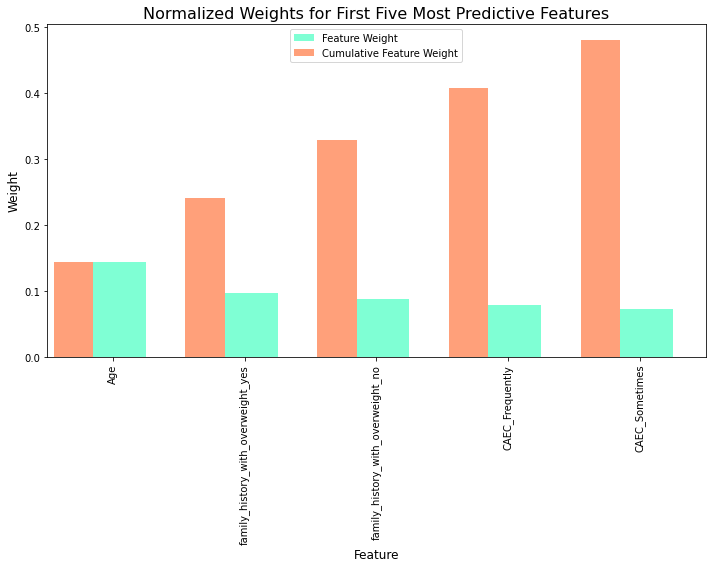

In [79]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import RandomForestClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = RandomForestClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
feature_plot(importances, X_train, y_train)